In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [ ]:
def f(X):
  return X[0]**2-10*X[1]*np.cos(0.2*np.pi*X[0])+X[1]**2-15*X[0]*np.cos(0.4*np.pi*X[1])

In [ ]:
x1=np.linspace(-15,15,100)
x2=np.linspace(-15,15,100)

X1,X2=np.meshgrid(x1,x2)
Z=X1**2-10*X2*np.cos(0.2*np.pi*X1)+X2**2-15*X1*np.cos(0.4*np.pi*X2)

In [ ]:
import sympy as sym
x_sym = sym.Symbol('x')
y_sym = sym.Symbol('y')

In [ ]:
print(sym.diff(x_sym**2-10*y_sym*sym.cos(0.2*np.pi*x_sym)+y_sym**2-15*x_sym*sym.cos(0.4*np.pi*y_sym), x_sym))
print(sym.diff(x_sym**2-10*y_sym*sym.cos(0.2*np.pi*x_sym)+y_sym**2-15*x_sym*sym.cos(0.4*np.pi*y_sym), y_sym))

2*x + 6.28318530717959*y*sin(0.628318530717959*x) - 15*cos(1.25663706143592*y)
18.8495559215388*x*sin(1.25663706143592*y) + 2*y - 10*cos(0.628318530717959*x)


In [ ]:
print(sym.diff(x_sym**2-10*y_sym*sym.cos(0.2*np.pi*x_sym)+y_sym**2-15*x_sym*sym.cos(0.4*np.pi*y_sym), x_sym))

2*x + 6.28318530717959*y*sin(0.628318530717959*x) - 15*cos(1.25663706143592*y)


In [ ]:
def rond_f_x1(x1,x2):
  return 2*x1 + 6.28318530717959*x2*np.sin(0.628318530717959*x1) - 15*np.cos(1.25663706143592*x2)

In [ ]:
def rond_f_x2(x1,x2):
  return 18.8495559215388*x1*np.sin(1.25663706143592*x2) + 2*x2 - 10*np.cos(0.628318530717959*x1)

In [ ]:
def aggregate(X):
  return np.array([rond_f_x1(X[0],X[1]),rond_f_x2(X[0],X[1])])

In [ ]:
from numpy import linalg as LA
def return_tk(beta, sigma, X, gradf ,func):
    i = 0
    while True:
        if func(X+ np.power(beta, i) * -gradf(X)) <= func(X) + np.power(beta, i) * sigma * gradf(X).T @ (-gradf(X)) :
            break
        i += 1
    return np.power(beta, i)

In [ ]:
def grad_descent_with_armijo(f, gradf, init,beta, sigma, max_iter):
    thresh = 1e-5
    prev_t = init-10*thresh
    t = init.copy()
    t = t.astype('float32')
    count = 0
    print("Starting point at {}".format(init))
    while LA.norm(t-prev_t) > thresh and count < max_iter:
        tk=return_tk(beta, sigma, t, gradf ,f)
        print("Optimum learning rate in epoch {} is {} at the point {}".format(count+1,tk,t))
        prev_t = t.copy()
        t -= tk*gradf(t)
        count += 1
    print("Ending point after {} epochs is {}".format(count,t))
    return init,t

In [ ]:
IN_1,Res_1=grad_descent_with_armijo(f,aggregate, np.array([10, 7]), 0.5,0.0001,5)


Starting point at [10  7]
Optimum learning rate in epoch 1 is 0.125 at the point [10.  7.]
Optimum learning rate in epoch 2 is 0.125 at the point [ 5.9830933 -7.349364 ]
Optimum learning rate in epoch 3 is 0.25 at the point [-0.69719076 -3.8783956 ]
Optimum learning rate in epoch 4 is 0.03125 at the point [-2.330353   3.5675075]
Optimum learning rate in epoch 5 is 0.03125 at the point [-1.5947603  2.0410316]
Ending point after 5 epochs is [-1.5503504  2.5940385]


In [ ]:
print(f(IN_1))
print(f(Res_1))

200.3525491562421
-28.53638193727287


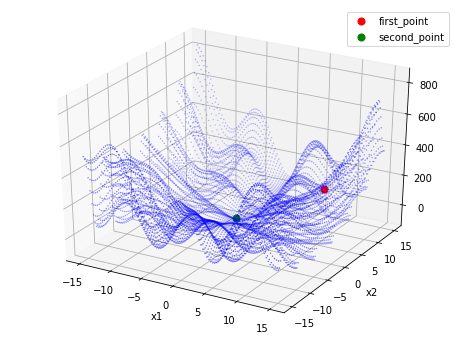

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X1, X2, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_1[0],IN_1[1], f(IN_1), color='red',s=50,label='first_point');

ax.scatter3D(Res_1[0] ,Res_1[1] ,f(Res_1), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2');

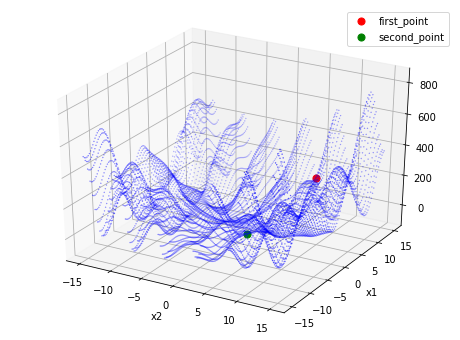

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X2, X1, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_1[1],IN_1[0], f(IN_1), color='red',s=50,label='first_point');

ax.scatter3D(Res_1[1] ,Res_1[0] ,f(Res_1), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x2')
ax.set_ylabel('x1');

In [ ]:
def f_sym(x1,x2):
  return x1**2-10*x2*sym.cos(0.2*sym.pi*x1)+x2**2-15*x1*sym.cos(0.4*sym.pi*x2)

In [ ]:
f_sym(x_sym,y_sym)

x**2 - 15*x*cos(0.4*pi*y) + y**2 - 10*y*cos(0.2*pi*x)

In [ ]:
alfa = sym.Symbol('a')

In [ ]:
sym.diff(f_sym(x_sym,y_sym),x_sym)

2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)

In [ ]:
sym.diff(f_sym(x_sym,y_sym),y_sym)

6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)

In [ ]:
x_sym-alfa*sym.diff(f_sym(x_sym,y_sym),x_sym)

-a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + x

In [ ]:
def phi(x_sym,y_sym,alfa):
  return f_sym(x_sym-alfa*sym.diff(f_sym(x_sym,y_sym),x_sym),y_sym-alfa*sym.diff(f_sym(x_sym,y_sym),y_sym))

In [ ]:
phi(x_sym,y_sym,alfa)

-(-15*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + 15*x)*cos(pi*(-0.4*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + 0.4*y)) + (-a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + x)**2 - (-10*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + 10*y)*cos(pi*(-0.2*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + 0.2*x)) + (-a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + y)**2

In [ ]:
sym.diff(phi(x_sym,y_sym,alfa),alfa)

(-a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + x)*(-4*x - 4.0*pi*y*sin(0.2*pi*x) + 30*cos(0.4*pi*y)) - pi*(15*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) - 15*x)*(-2.4*pi*x*sin(0.4*pi*y) - 0.8*y + 4.0*cos(0.2*pi*x))*sin(pi*(-0.4*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + 0.4*y)) + (-a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + y)*(-12.0*pi*x*sin(0.4*pi*y) - 4*y + 20*cos(0.2*pi*x)) - pi*(10*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) - 10*y)*(-0.4*x - 0.4*pi*y*sin(0.2*pi*x) + 3.0*cos(0.4*pi*y))*sin(pi*(-0.2*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + 0.2*x)) + (30*x + 30.0*pi*y*sin(0.2*pi*x) - 225*cos(0.4*pi*y))*cos(pi*(-0.4*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) + 0.4*y)) + (60.0*pi*x*sin(0.4*pi*y) + 20*y - 100*cos(0.2*pi*x))*cos(pi*(-0.2*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) + 0.2*x))

In [ ]:
f_prim=sym.simplify(sym.diff(phi(x_sym,y_sym,alfa),alfa))
f_prim

(a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) - x)*(4*x + 4.0*pi*y*sin(0.2*pi*x) - 30*cos(0.4*pi*y)) - 15*pi*(a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) - x)*(2.4*pi*x*sin(0.4*pi*y) + 0.8*y - 4.0*cos(0.2*pi*x))*sin(pi*(0.4*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) - 0.4*y)) - 10*pi*(a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) - y)*(0.4*x + 0.4*pi*y*sin(0.2*pi*x) - 3.0*cos(0.4*pi*y))*sin(pi*(0.2*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) - 0.2*x)) + (a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) - y)*(12.0*pi*x*sin(0.4*pi*y) + 4*y - 20*cos(0.2*pi*x)) + (30*x + 30.0*pi*y*sin(0.2*pi*x) - 225*cos(0.4*pi*y))*cos(pi*(0.4*a*(6.0*pi*x*sin(0.4*pi*y) + 2*y - 10*cos(0.2*pi*x)) - 0.4*y)) + (60.0*pi*x*sin(0.4*pi*y) + 20*y - 100*cos(0.2*pi*x))*cos(pi*(0.2*a*(2*x + 2.0*pi*y*sin(0.2*pi*x) - 15*cos(0.4*pi*y)) - 0.2*x))

In [ ]:
eq1=f_prim.subs({x_sym: -21.902258, y_sym:-52.440544})
eq1

-10*pi*(a*(-104.881088 - 10*cos(0.3804516*pi) + 131.413548*pi*sin(0.976217600000002*pi)) + 52.440544)*(-8.7609032 - 3.0*cos(0.976217600000002*pi) + 20.9762176*pi*sin(0.3804516*pi))*sin(pi*(0.2*a*(-43.804516 - 15*cos(0.976217600000002*pi) + 104.881088*pi*sin(0.3804516*pi)) + 4.3804516)) + (a*(-104.881088 - 10*cos(0.3804516*pi) + 131.413548*pi*sin(0.976217600000002*pi)) + 52.440544)*(-209.762176 - 20*cos(0.3804516*pi) + 262.827096*pi*sin(0.976217600000002*pi)) - 15*pi*(a*(-43.804516 - 15*cos(0.976217600000002*pi) + 104.881088*pi*sin(0.3804516*pi)) + 21.902258)*(-41.9524352 - 4.0*cos(0.3804516*pi) + 52.5654192*pi*sin(0.976217600000002*pi))*sin(pi*(0.4*a*(-104.881088 - 10*cos(0.3804516*pi) + 131.413548*pi*sin(0.976217600000002*pi)) + 20.9762176)) + (a*(-43.804516 - 15*cos(0.976217600000002*pi) + 104.881088*pi*sin(0.3804516*pi)) + 21.902258)*(-87.609032 - 30*cos(0.976217600000002*pi) + 209.762176*pi*sin(0.3804516*pi)) + (-657.06774 - 225*cos(0.976217600000002*pi) + 1573.21632*pi*sin(0.38045

In [ ]:
from sympy import nsolve,solve

In [ ]:
float(nsolve((eq1), (alfa),[0.05+1e-3+1e-5]))

0.23350901379815603

In [ ]:
def sel_start_a(eq,a_start):
  E=1
  D=1
  while True:
      try :
        a=float(nsolve((eq), (alfa),[a_start]))
        if a>0 :
          break
        else:
          a_start+=1e-3
          a=float(nsolve((eq), (alfa),[a_start]))
          if a>0:
            break
          else :
            a_start+=1e-3
      except:
        a_start+=1e-3
  
  return a    

In [ ]:
sel_start_a(eq1,0.24)

0.07632347469591187

In [ ]:
sel_start_a(eq1,0.24+2e-3)

0.07632347469591187

In [ ]:
def grad_descent_with_Analytical(f, gradf, init,a_start, max_iter):
    thresh = 1e-5
    prev_t = init-10*thresh
    t = init.copy()
    t = t.astype('float32')
    count = 0
    print("Starting point at {}".format(init))
    while LA.norm(t-prev_t) > thresh and count < max_iter:
      eq1=f_prim.subs({x_sym: t[0], y_sym:t[1]})
      a=sel_start_a(eq1,a_start)
      prev_t = t.copy()
      t -= a*gradf(t)
      count += 1
      print("Optimum learning rate in epoch {} is {} at the point {}".format(count,a,t))

    print("Ending point after {} epochs is {}".format(count,t))
    return init,t

In [ ]:
IN_2,Res_2=grad_descent_with_Analytical(f,aggregate, np.array([10,7]),0.05,5)

Starting point at [10  7]
Optimum learning rate in epoch 1 is 0.14750244724195194 at the point [ 5.259971 -9.93253 ]
Optimum learning rate in epoch 2 is 0.021612263736707354 at the point [ 5.136294 -9.897908]
Optimum learning rate in epoch 3 is 0.008496833059534935 at the point [ 5.130218 -9.919612]
Optimum learning rate in epoch 4 is 0.02163245996749606 at the point [ 5.120901 -9.917005]
Optimum learning rate in epoch 5 is 0.008514065295673143 at the point [ 5.120457 -9.91859 ]
Ending point after 5 epochs is [ 5.120457 -9.91859 ]


In [ ]:
print(f(IN_2))
print(f(Res_2))

200.3525491562421
-50.70972630246388


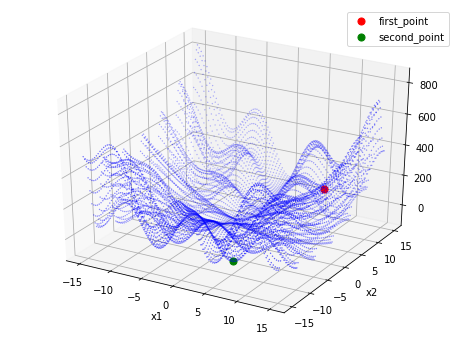

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X1, X2, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_2[0],IN_2[1], f(IN_2), color='red',s=50,label='first_point');

ax.scatter3D(Res_2[0] ,Res_2[1] ,f(Res_2), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2');

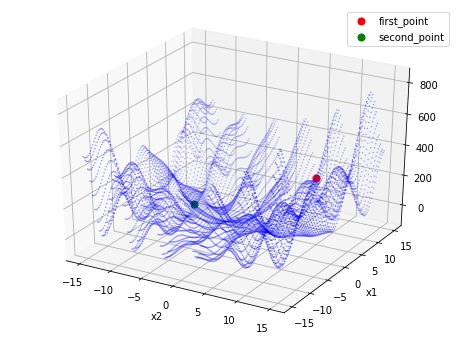

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter3D(X2, X1, f(np.array([X1,X2])), color='blue',s=0.1);

ax.scatter3D(IN_2[1],IN_2[0], f(IN_2), color='red',s=50,label='first_point');

ax.scatter3D(Res_2[1] ,Res_2[0] ,f(Res_2), color='green',s=50,label='second_point')
ax.legend()
ax.set_xlabel('x2')
ax.set_ylabel('x1');

In [ ]:
RES=np.zeros((20,2))
for i,st in enumerate(np.linspace(0.01,0.1,20)):
  RES[i]=grad_descent_with_Analytical(f,aggregate, np.array([10,7]),st,5)[1]

Starting point at [10  7]
Optimum learning rate in epoch 1 is 0.1879267171272646 at the point [  3.960927 -14.57303 ]
Optimum learning rate in epoch 2 is 5.793840886216184 at the point [ 355.028    -112.849464]
Optimum learning rate in epoch 3 is 0.43027848191049867 at the point [   38.29436 -1244.3054 ]
Optimum learning rate in epoch 4 is 0.06538512893695375 at the point [ -414.91565 -1117.4346 ]
Optimum learning rate in epoch 5 is 1.3527148990286655 at the point [ 184.26582 1023.3127 ]
Ending point after 5 epochs is [ 184.26582 1023.3127 ]
Starting point at [10  7]
Optimum learning rate in epoch 1 is 0.38661702638548107 at the point [ -2.4240367 -37.381668 ]
Optimum learning rate in epoch 2 is 0.26256794415760776 at the point [-66.646805 -19.403368]
Optimum learning rate in epoch 3 is 0.17920354999479426 at the point [-22.010063 140.04953 ]
Optimum learning rate in epoch 4 is 0.23039247237780053 at the point [184.78622  82.1604 ]
Optimum learning rate in epoch 5 is 0.1204995017988715

In [ ]:
RES

array([[ 1.84265823e+02,  1.02331268e+03],
       [ 1.30277267e+02, -1.12562340e+02],
       [-4.63610382e+01,  1.65516266e+02],
       [ 5.33495483e+01,  1.49340401e+01],
       [ 5.85183228e+02,  5.02419238e+03],
       [ 8.26943741e+01, -1.04820190e+02],
       [-4.76641208e-01,  7.09674644e+00],
       [ 1.57307835e+01, -2.44904399e+00],
       [ 1.71554779e+02, -6.59407043e+02],
       [ 1.89735889e+01,  3.47997411e-03],
       [ 1.19089117e+01,  1.48108578e+01],
       [-1.97793179e+01,  1.56624725e+02],
       [ 4.20152893e+02, -9.02675049e+02],
       [-2.42787285e+01,  1.07268349e+02],
       [ 1.61802635e+01, -2.99684391e+01],
       [-1.99951309e+02,  3.49885368e+01],
       [-1.01809797e+01,  4.02215614e+01],
       [-1.09484100e+00, -5.70756197e+00],
       [-2.78168030e+01, -6.70805740e+01],
       [-1.10871132e+02, -1.47413651e+02]])

Text(0, 0.5, 'Function value')

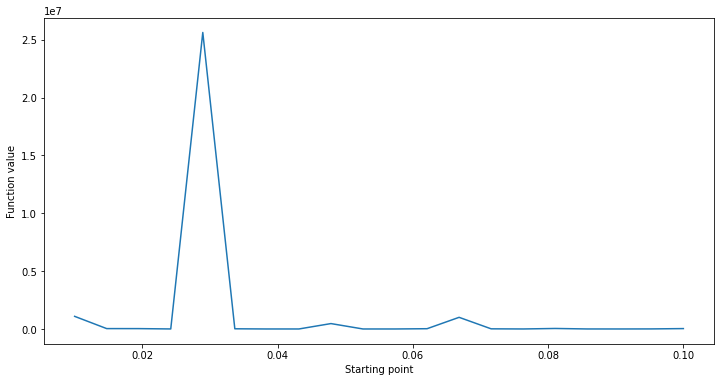

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(0.01,0.1,20),[f(res) for res in RES])
plt.xlabel('Starting point')
plt.ylabel('Function value')